In [12]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util


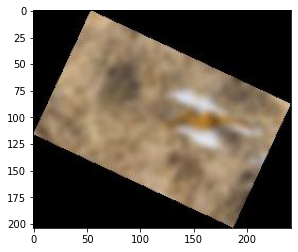

In [13]:
image = cv.imread('izol3.jpg')
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

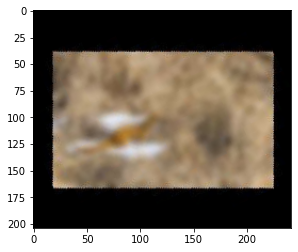

In [14]:
(h, w, d) = rgb_image.shape
angle = 205
scale = 1.0
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
rotated = cv.warpAffine(rgb_image, M, (w, h))
plt.imshow(rotated)


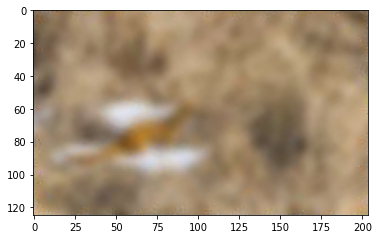

In [15]:
rows, cols, dim = rotated.shape
ROI = (20, 40, rows, 125)  #(x0, y0, height, width)
cropped_image = rotated[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
plt.imshow(cropped_image)

In [17]:
histSize = [256]
range = [0, 256]


def plot_rgb_hist(image, histSize, range):
    histSize = [256]
    range = [0, 256]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, range)
        plt.plot(hist, color=col)
        plt.xlim(range)

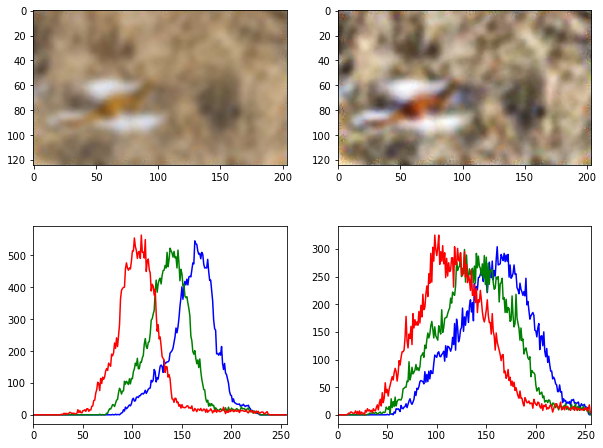

In [19]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

rgb_result_image = np.empty(np.shape(cropped_image), np.uint8)
rgb_result_image[:, :, 0] = clahe.apply(cropped_image[:, :, 0])
rgb_result_image[:, :, 1] = clahe.apply(cropped_image[:, :, 1])
rgb_result_image[:, :, 2] = clahe.apply(cropped_image[:, :, 2])

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(cropped_image)
plt.subplot(gs[1])
plt.imshow(rgb_result_image)
plt.subplot(gs[2])
plot_rgb_hist(cropped_image, histSize, range)
plt.subplot(gs[3])
plot_rgb_hist(rgb_result_image, histSize, range)

plt.show()
